In [1]:
## Import Python libraries ##
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## Import the data ##
ISS_data = pd.read_csv('GQS_answers_20180630.txt', sep='|')

## Add additional column - Number of questions asked ##
# Create sub dataset that computes the total number of questions asked for each company ID #
ISS_sub_data = pd.DataFrame(ISS_data['COMPANY_ID'].value_counts()).rename(columns={'COMPANY_ID': 'NO_OF_QUESTIONS'})
# Merge the ISS_data with ISS_sub_data #
ISS_data = pd.merge(ISS_data ,ISS_sub_data, how='left', left_on='COMPANY_ID', right_on=ISS_sub_data.index) 

## Print total number of companies that are interviewed ##
print('Total no. of companies in ISS Governance Data: %d' % len(ISS_data['COMPANY_ID'].drop_duplicates()))

## Display the first 5 rows of data ##
ISS_data.head()

Total no. of companies in ISS Governance Data: 5710


,COMPANY_ID,COMPANY_NAME,COUNTRY,REGION,UPDATED,QUESTION_ID,QUESTION,SUBCATEGORY,ANSWER_ID,ANSWER_VAL,ANSWER,POINTS,DISPLAY TEXT,NO_OF_QUESTIONS
0,100214,Millennium & Copthorne Hotels plc,GB,Anglo,20180619,1,Non-Audit fees represent what percentage of to...,External Auditor,94,25.00,Percentage,0.0,Non-audit fees represent 25% of total fees. (Q1),75
1,100214,Millennium & Copthorne Hotels plc,GB,Anglo,20180619,10,What percentage of the board is independent ac...,Board Composition,94,66.67,Percentage,0.0,66.67% of the board of directors is considered...,75
2,100214,Millennium & Copthorne Hotels plc,GB,Anglo,20180619,110,Do non-executive directors participate to perf...,Non-Executive Pay,47,NaN,No,0.0,Non-executive directors do not participate in ...,75
3,100214,Millennium & Copthorne Hotels plc,GB,Anglo,20180619,113,Does the company disclose a performance measur...,Communications and Disclosure,174,NaN,There is no variable performance related payment,0.0,The disclosure of performance measures is not ...,75
4,100214,Millennium & Copthorne Hotels plc,GB,Anglo,20180619,114,Is there a cap on CEO's annual bonus?,Pay For Performance,193,NaN,"Yes, expressed in percentage of salary",0.0,The company applies a cap on the CEO's bonus w...,75


In [3]:
## Exploratory Data Analysis ## 
ISS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532348 entries, 0 to 532347
Data columns (total 14 columns):
COMPANY_ID         532348 non-null int64
COMPANY_NAME       532348 non-null object
COUNTRY            532348 non-null object
REGION             532348 non-null object
UPDATED            532348 non-null int64
QUESTION_ID        532348 non-null int64
QUESTION           532348 non-null object
SUBCATEGORY        532348 non-null object
ANSWER_ID          532348 non-null int64
ANSWER_VAL         166450 non-null float64
ANSWER             532348 non-null object
POINTS             532348 non-null float64
DISPLAY TEXT       532348 non-null object
NO_OF_QUESTIONS    532348 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 60.9+ MB


## (A1) Identify potential companies that have stocks with unequal voting rights ##

> ### One Share One Vote (OSOV) Questions ###
(1) 54 - Does the company have classes of stock with different voting rights or unequal ability to elect directors? <br>
(2) 56 - Is there a sunset provision on the company's unequal voting structure? <br>
(3) 57 - What is the proportion of multiple voting rights (or voting certificates) relative to the total number of voting rights? <br>
(4) 58 - What is the level of free float of the multiple voting rights or voting certificates? <br>
(5) 63 - What percentage of the company's share capital is made up of non-voting shares? <br>
(6) 64 - What is the level of free float of voting shares in relation to the non-voting shares? <br>
(7) 65 - Does the company have an absolute voting right ceiling? <br>
(8) 66 - Does the company have a relative voting right ceiling? <br>
(9) 69 - Do shareholders or the State have the priority right? <br>
(10) 217 - Is there a coattail provision attached to the company's unequal voting structure? <br>
(11) 369 - Does the company have class shares with full or multiple voting rights? <br>

In [4]:
## Identify the list of companies that have been asked OSOV questions ##
OSOV_qn_no_list = [54,56,57,58,63,64,65,66,69,217,369] 
ISS_OSOV_data = ISS_data.loc[ISS_data['QUESTION_ID'].isin(OSOV_qn_no_list)]

Total no. of companies polled for Q63: 1357
Total no. of companies with non-voting stocks: 35


C:\Users\C_YEE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


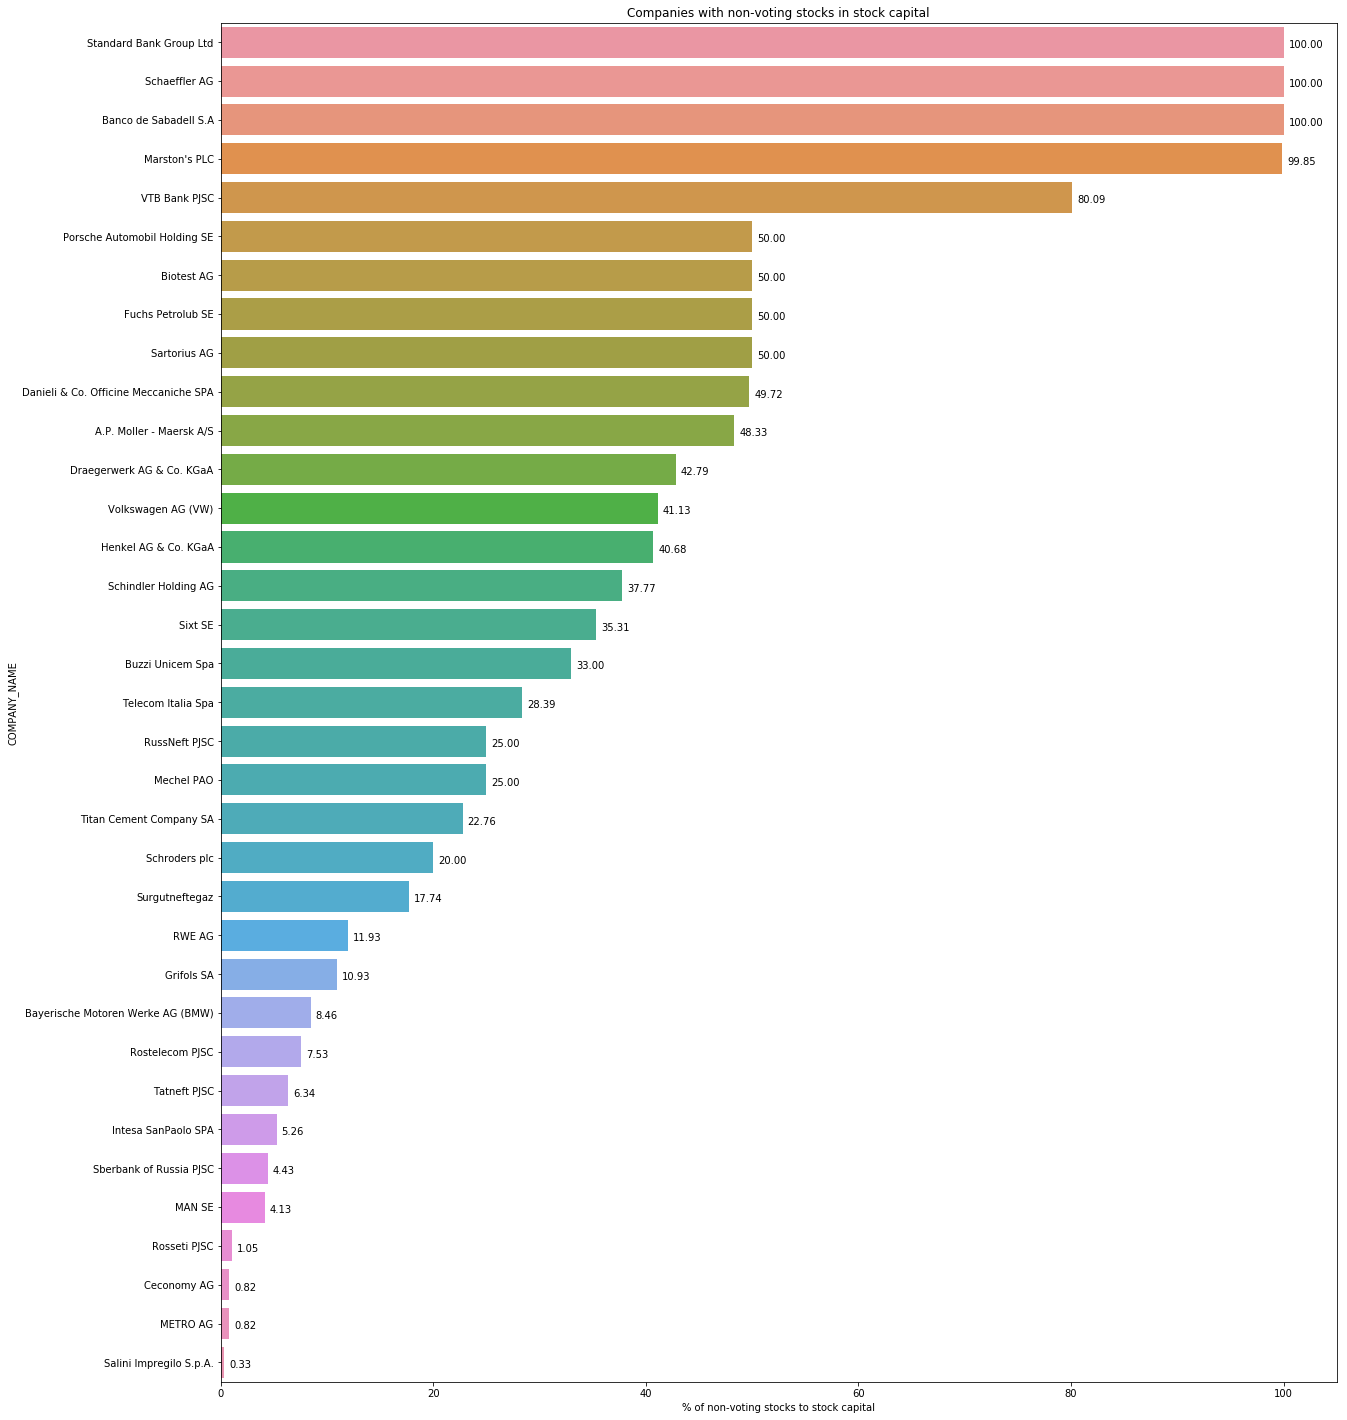

In [5]:
## Print total number of unique companies that have been asked question about non-voting stocks, i.e. Question 63 ##
print('Total no. of companies polled for Q63: %d' % len(ISS_OSOV_data[ISS_OSOV_data['QUESTION_ID'].isin([63])]))

## Identify the list of unique companies that have non-voting stocks, i.e. Question 63, and print results ##
companies_non_voting = ISS_OSOV_data[(ISS_OSOV_data['QUESTION_ID'].isin([63])) &
                                     (ISS_OSOV_data['ANSWER_VAL'] > 0)]
print('Total no. of companies with non-voting stocks: %d' % len(companies_non_voting))

## Display visualization ##
# Sort the companies_non_voting in descending order using ANSWER_VAL #
companies_non_voting.sort_values(by=['ANSWER_VAL'], ascending=False, inplace=True)
# Plot bar charts of all the companies with non-voting shares #
plt.figure(figsize=(20,25))
ax = sns.barplot(x=companies_non_voting['ANSWER_VAL'], y=companies_non_voting['COMPANY_NAME'])
# Set title and labels #
ax.set_title('Companies with non-voting stocks in stock capital')
ax.set_xlabel('% of non-voting stocks to stock capital')
# Annotate each bar plot #
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.8),
                xytext=(5, 10), textcoords='offset points')
# Display the plot #
plt.show()

## (A2) Sanity checks on 3 companies with 100% non-voting rights ##
> Theoretically, if a company only issues stocks with 100% non-voting rights, there should not be other classes of stocks. <br><br> 
In other words, the results of polling Q57 to the 3 companies should yield an answer of 0. We will ascertain this by performing the query below.

In [6]:
## Sanity checks on 3 companies that have stocks with 100% non-voting rights ##
# Filter the 3 companies by COMPANY_ID #
companies_non_voting_list_3 = list(ISS_OSOV_data['COMPANY_ID'][(ISS_OSOV_data['QUESTION_ID'].isin([63])) &
                                                               (ISS_OSOV_data['ANSWER_VAL'] == 100)])
# Display individual company's responses to Q57 #
ISS_OSOV_data[['COMPANY_NAME', 'QUESTION', 'ANSWER_VAL']][(ISS_OSOV_data['COMPANY_ID'].isin(companies_non_voting_list_3)) & 
                                                          (ISS_OSOV_data['QUESTION_ID'].isin([57]))]

,COMPANY_NAME,QUESTION,ANSWER_VAL
144455,Standard Bank Group Ltd,What is the proportion of multiple voting righ...,0.0
464405,Schaeffler AG,What is the proportion of multiple voting righ...,0.0


## (A2) Conclusions on 3 companies with 100% non-voting rights ##

> From the query above: <br>
(1) We have confirmed that 2 companies, i.e. Standard Bank Group and Schaeffler, do not have other classes of stocks. <br>
(2) As for Banco de Sabadell, it would seem that this question was not asked or not documented. From the data completeness standpoint, we may need to ascertain this with ISS.

## (A3) Profile of remaining 32 companies ##
> It would be interesting to see the level of insights that we can gather from the remaining 32 companies <br> <br>
In particular: <br>
(i) What is the level of free float of voting shares in relation to the non-voting shares? (Q64) <br>
(ii) Do shareholders or the State have the priority right? (Q69)

In [7]:
## A4(i) Compute free-float voting shares in relation to share capital for the remaining 32 companies ##
# Filter the remaining 32 companies #
companies_non_voting_32 = ISS_OSOV_data[['COMPANY_ID','COMPANY_NAME','ANSWER_VAL']][
                                        (ISS_OSOV_data['QUESTION_ID'].isin([63])) &
                                        (ISS_OSOV_data['ANSWER_VAL'] > 0) & 
                                        (ISS_OSOV_data['ANSWER_VAL'] != 100)]
companies_non_voting_32.columns = ['COMPANY_ID', 'COMPANY_NAME', 'NON_VOTING_TO_SHARE_CAP']
companies_non_voting_list_32 = list(companies_non_voting_32['COMPANY_ID'])
# Obtain the level of free float voting shares (in relation to the non-voting shares) from Q64 #
companies_free_float = ISS_OSOV_data[['COMPANY_ID', 'ANSWER_VAL']][
                                    (ISS_OSOV_data['COMPANY_ID'].isin(companies_non_voting_list_32)) & 
                                    (ISS_OSOV_data['QUESTION_ID'].isin([64]))]
companies_free_float.columns = ['COMPANY_ID', 'FREE_FLOAT_VOTING_LEVEL']

## Obtain the level of free float voting shares (in relation to the non-voting shares) from Q69 ##
companies_stock_rights = ISS_OSOV_data[['COMPANY_ID', 'ANSWER']][
                                      (ISS_OSOV_data['COMPANY_ID'].isin(companies_non_voting_list_32)) & 
                                      (ISS_OSOV_data['QUESTION_ID'].isin([69]))]
companies_stock_rights.columns = ['COMPANY_ID', 'PRIORITY']

## Merge the 3 datasets together ##
companies_non_voting_32 = pd.merge(companies_non_voting_32, companies_free_float, how='left', on='COMPANY_ID')
companies_non_voting_32 = pd.merge(companies_non_voting_32, companies_stock_rights, how='left', on='COMPANY_ID')

## Compute the free-float voting shares and non-free-float voting shares in relation to share capital ## 
companies_non_voting_32['FREE_FLOAT_VOTING_TO_SHARE_CAP'] = companies_non_voting_32['NON_VOTING_TO_SHARE_CAP'] * \
                                                            companies_non_voting_32['FREE_FLOAT_VOTING_LEVEL'] / 100
companies_non_voting_32['NON_FREE_FLOAT_VOTING_TO_SHARE_CAP'] = 100 - \
                                                                (companies_non_voting_32['FREE_FLOAT_VOTING_TO_SHARE_CAP'] + \
                                                                 companies_non_voting_32['NON_VOTING_TO_SHARE_CAP'])
companies_non_voting_32

,COMPANY_ID,COMPANY_NAME,NON_VOTING_TO_SHARE_CAP,FREE_FLOAT_VOTING_LEVEL,PRIORITY,FREE_FLOAT_VOTING_TO_SHARE_CAP,NON_FREE_FLOAT_VOTING_TO_SHARE_CAP
0,114215,Telecom Italia Spa,28.39,76.06,"Yes, high importance",21.593434,50.016566
1,127731,RWE AG,11.93,100.00,No,11.930000,76.140000
2,133397,Rostelecom PJSC,7.53,36.51,"Yes, high importance",2.749203,89.720797
3,13885,Bayerische Motoren Werke AG (BMW),8.46,53.23,No,4.503258,87.036742
4,161519,Volkswagen AG (VW),41.13,10.79,"Yes, high importance",4.437927,54.432073
5,502991,Biotest AG,50.00,10.12,"Yes, low importance",5.060000,44.940000
6,503397,Fuchs Petrolub SE,50.00,46.00,No,23.000000,27.000000
7,504224,Sberbank of Russia PJSC,4.43,NaN,"Yes, high importance",NaN,NaN
8,504326,Sixt SE,35.31,38.38,"Yes, high importance",13.551978,51.138022
9,504679,Ceconomy AG,0.82,59.23,No,0.485686,98.694314


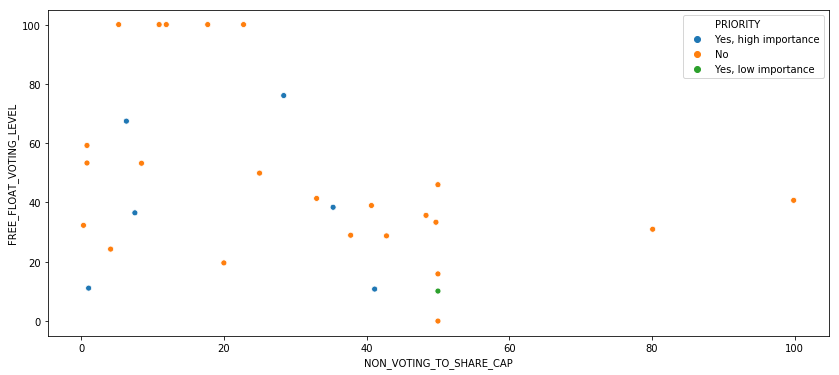

In [8]:
## Display visualization ##
plt.figure(figsize=(14,6))
sns.scatterplot(x=companies_non_voting_32['NON_VOTING_TO_SHARE_CAP'], 
                y=companies_non_voting_32['FREE_FLOAT_VOTING_LEVEL'], hue=companies_non_voting_32['PRIORITY'])

## (A3) Conclusions on the profile of remaining 32 companies ##
> There are a few conclusions that we have derived from the analyses above <br> <br>
(1) There are 2 companies, i.e. Sberbank of Russia PJSC and RussNeft PJSC, that do not contain any information about the free floating voting rights. <br>
(2) We have assumed the definition of FREE_FLOAT_VOTING_LEVEL to be a percentage of the NON_VOTING_TO_SHARE_CAP. However, in our computations of the FREE_FLOAT_VOTING_TO_SHARE_CAP and NON_FREE_FLOAT_VOTING_TO_SHARE_CAP, we realized that the sums do not add up. <br>
(3) Due to the inconsistencies spotted in (2), we have relied on the original raw data, i.e. FREE_FLOAT_VOTING_LEVEL and NON_VOTING_TO_SHARE_CAP, for our visualization. 

## (B) Match companies from other prior work against ISS dataset ##
> In our previous analysis, we noticed that there were 35 companies that have non-voting power stocks in ISS dataset. However, the number does not tally with the results obtained from past work done. <br> <br>
As such, we are interested to find out the list of companies (from prior work done) that are not covered in ISS dataset. 

In [24]:
## Create list containing companies with non-voting power stocks identified from prior work ##
companies_prior_list = ['A P Moller', 'Daily Mail', 'Eaton Vance', 'Fuchs Petrolub', 'Henkel', 
                        'Liberty Broadband', 'Liberty Latin America', 'Liberty Media', 'McCormick', 'Porsche', 
                        'Roche', 'Rogers Communications', 'Sartorius', 'Schindler', 'Shaw Communications', 
                        'Snap', 'Twenty First Century Fox', 'Viacom', 'Volkswagen', 'Zillow', 
                        'America Movil', 'Banco Bradesco', 'BanColombia', 'Bradespar', 'Braskem', 
                        'Cemex', 'Cia Energetica', 'Companhia Brasileira', 'Embotelladora Andina', 'Gerdau', 
                        'Grupo', 'Itau Unibanco', 'Itausa Investimentos','Lojas Americanas', 'Petroleo Brasileiro', 
                        'Telefonica Brasil', 'Transneft'] 

## Convert each company name to small case ##
companies_prior_list = [company.lower() for company in companies_prior_list]

## Merge the datasets and find the unmatched cases ##
# Create a copy of the original ISS dataset #
ISS_data_copy = ISS_data.copy()
# Change the company name in ISS dataset to small case #
ISS_data_copy['COMPANY_NAME'] = ISS_data_copy['COMPANY_NAME'].str.lower()
# Initialize an empty column in ISS dataset: COMPANY_NAME_PRIOR #
ISS_data_copy['COMPANY_NAME_PRIOR'] = ''
# Loop through each company in companies_prior_list and identify matching records in ISS dataset ##
for company in companies_prior_list:
    if len(ISS_data_copy['COMPANY_NAME'].str.contains(company)):
        ISS_data_copy['COMPANY_NAME_PRIOR'][ISS_data_copy['COMPANY_NAME'].str.contains(company)] = 'Yes'
    else:
        ISS_data_copy['COMPANY_NAME_PRIOR'][ISS_data_copy['COMPANY_NAME'].str.contains(company)] = 'No'

## Print the companies that found in both prior work and ISS database ##


C:\Users\C_YEE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COMPANY_ID,COMPANY_NAME,COUNTRY,REGION,UPDATED,QUESTION_ID,QUESTION,SUBCATEGORY,ANSWER_ID,ANSWER_VAL,ANSWER,POINTS,DISPLAY TEXT,NO_OF_QUESTIONS,COMPANY_NAME_PRIOR
19554,118464,park electrochemical corp.,US,US - R3K,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,0.00,Percentage,0.0000,Non-audit fees represent 0% of total fees. (Q1),116,Yes
19555,118464,park electrochemical corp.,US,US - R3K,20180521,10,What percentage of the board is independent ac...,Board Composition,94,80.00,Percentage,1.4533,80% of the board of directors is considered in...,116,Yes
19556,118464,park electrochemical corp.,US,US - R3K,20180521,113,Does the company disclose a performance measur...,Communications and Disclosure,174,NaN,There is no variable performance related payment,0.0000,The disclosure of performance measures is not ...,116,Yes
19557,118464,park electrochemical corp.,US,US - R3K,20180521,129,Do the company's active equity plans prohibit ...,Use Of Equity,79,NaN,Not applicable (company does not issue options...,0.1041,Share recycling is not a concern as options/SA...,116,Yes
19558,118464,park electrochemical corp.,US,US - R3K,20180521,13,What proportion of non-executive directors on ...,Board Composition,94,50.00,Percentage,-0.3644,50% of the non-executive directors on the boar...,116,Yes
19559,118464,park electrochemical corp.,US,US - R3K,20180521,130,Does the company's equity grant rate exceed th...,Use Of Equity,116,NaN,The average annual burn rate over the past thr...,0.0000,The company's average equity grant rate over t...,116,Yes
19560,118464,park electrochemical corp.,US,US - R3K,20180521,131,What are the minimum vesting periods mandated ...,Equity Risk Mitigation,56,NaN,No disclosure,-0.3044,The company's active equity incentive plans do...,116,Yes
19561,118464,park electrochemical corp.,US,US - R3K,20180521,132,What are the minimum vesting periods mandated ...,Equity Risk Mitigation,135,NaN,"The company does not grant restricted stock, o...",0.3653,The minimum vesting periods for restricted sto...,116,Yes
19562,118464,park electrochemical corp.,US,US - R3K,20180521,134,What is the holding/retention period for stock...,Equity Risk Mitigation,244,NaN,The company is silent on holding periods for s...,0.0000,The company is silent on holding/retention per...,116,Yes
19563,118464,park electrochemical corp.,US,US - R3K,20180521,135,What is the holding/retention period for restr...,Equity Risk Mitigation,134,NaN,The company does not grant restricted shares,0.2121,The holding period for restricted shares/stock...,116,Yes


In [27]:
ISS_data_copy[ISS_data_copy['COMPANY_NAME_PRIOR'] == 'Yes'].drop_duplicates(subset=['COMPANY_ID'])

,COMPANY_ID,COMPANY_NAME,COUNTRY,REGION,UPDATED,QUESTION_ID,QUESTION,SUBCATEGORY,ANSWER_ID,ANSWER_VAL,ANSWER,POINTS,DISPLAY TEXT,NO_OF_QUESTIONS,COMPANY_NAME_PRIOR
19554,118464,park electrochemical corp.,US,US - R3K,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,0.00,Percentage,0.0,Non-audit fees represent 0% of total fees. (Q1),116,Yes
20335,11862,banco bradesco s.a.,BR,Latin America,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,11.94,Percentage,0.0,Non-Audit fees represent 11.94% of total fees....,59,Yes
23106,120895,petroleo brasileiro sa-petrobras,BR,Latin America,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,80,NaN,Not disclosed,-2.4,The percentage of non-audit fees to total fees...,59,Yes
35043,131696,roche holding ltd,CH,Germanic,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,7.73,Percentage,0.0,Non-audit fees represent 7.73% of total fees. ...,75,Yes
35425,132209,rogers communications inc.,CA,Canada,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,1.21,Percentage,0.0,Non-Audit fees represent 1.21% of total fees. ...,87,Yes
42898,139973,shaw communications inc.,CA,Canada,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,14.04,Percentage,0.0,Non-Audit fees represent 14.04% of total fees....,87,Yes
45313,142269,snap-on incorporated,US,US - S&P500,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,27.08,Percentage,0.0,Non-audit fees represent 27.08% of total fees....,116,Yes
68321,161519,volkswagen ag (vw),DE,Germanic,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,42.42,Percentage,0.0,Non-audit fees represent 42.42% of total fees....,75,Yes
110572,46715,eaton vance corp.,US,US - R3K,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,94,24.31,Percentage,0.0,Non-audit fees represent 24.31% of total fees....,116,Yes
124390,502474,itau unibanco holding sa,BR,Latin America,20180521,1,Non-Audit fees represent what percentage of to...,External Auditor,80,NaN,Not disclosed,-2.4,The percentage of non-audit fees to total fees...,59,Yes


In [31]:
ISS_data_copy.loc[ == 'park electrochemical corp.') or 
              ~(ISS_data_copy['COMPANY_NAME'] == 'dr pepper snapple group, inc')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
np.where((ISS_data_copy['COMPANY_NAME'] != 'park electrochemical corp.'))

(array([     0,      1,      2, ..., 532345, 532346, 532347], dtype=int64),)